# Round 8. Sampling

To get started, you can use the provided Python template `sampling.py` or this notebook for reference. The usage of the notebook or template is **optional**. Then you only need to fill in the required functions. Some of the functions do NOT need modifications. You may start your solution after the subtitle "**Beginning of the Exercise**" down below. 

In addition to returning a short report of your results (including the visualizations), return also your commented Python code or notebook. Remember to label the axes in your figures!

Many network data sets are samples of some underlying graphs that we are actually interested in. That is, nodes and edges of these empirical networks have been sampled in a way that we only observe parts of them. This can severely bias even the most simple network measures we compute in a way that the values the measures get for the sampled graph can be very different than for the underlying graph.
In this exercise we will see the effect of three different sampling schemes on network transitivity $C$ and derive estimators that can be used to correct for these biases.  

Let us first recall the definition of transitivity $C$, defined during the lectures as:
\begin{equation} 
C =\frac{\tau_{\triangle}}{\tau_{\angle}} = \frac{\sum_i E_i}{\sum_i {k_i \choose 2}}\,, %=\frac{\text{3} \times \text{number of triangles in the network}}{\text{number of two-stars in the network}}\,,
\end{equation}

where $\tau_{\angle}$ is the number of two-stars (a node and two of its neighbors), $\tau_{\triangle}$ is three times the number of triangles (two-stars in which the neighbors are connected), $i$ is a node, $k_i$ is the degree of $i$, and $E_i$ is the number of triangles centered on $i$ (in other words, how many triangles pass by $i$).

In this exercise we will use the Horvitz-Thompson (HT) estimator to get a better estimate of $\tau_{\triangle}$ and $\tau_{\angle}$ under different sampling schemes. We will then use these estimators to get an estimator for $C$ by simply plugging them in the formula for $C$. In short, HT is a weighted estimator, where the weights are determined by the inverse of the probability of observations. This way, observations that are more unlikely to be sampled have a larger weight, and observations that are more likely to be sampled have a smaller weight.

The HT estimator is used to estimate totals of the form:
\begin{equation*}
    \tau = \sum_{i \in U} y_{i}\,,
\end{equation*}
where $U$ is the underlying population of units (in networks it could be edges, triangles, nodes of certain degree ...), and the $y_i$ is the number associated to unit $i$. Often we simply want to calculate the number of units, and in these cases we set $y_i=1$ for every $i$. The HT estimator can be written as
\begin{equation*}
    \hat{\tau} = \sum_{i \in S} \frac{y_{i}}{\pi_{i}} \,,
\end{equation*}
where $S \subseteq U$ is the random sample and $\pi_i$ is the probability of observing the unit $i$.


# Beginning of the exercise
Write your code for the sampling exercise when needed

### a. Bernoulli sampling of nodes
First let's focus on the case of Bernoulli sampling of nodes, where each node is sampled with probability $p$, and we observe an edge if and only if we have sampled the two nodes that form it. **Calculate** the probability of observing (i) a two-star and (ii) a triangle, commenting on how you obtained these probabilities. Notice that the probability of observing a stucture refers only to the probability of sampling it given that it exists, not to the probability of that structure first occuring in a network and then sampling it. Then, **write** the HT estimator for the total number of two-stars $\hat{\tau}_{\angle}^n$ and the HT estimator for the total number of triangles $\hat{\tau}_{\triangle}^n$, where the $n$ refers to the fact that we have perfomed sampling of nodes.

### b. Bernoulli sampling of edges
Now we perform Bernoulli sampling of edges, where each edge is sampled with probability $p$, and a node is observed if one of its edges is sampled. For this case also **calculate** the probability of oberving (i) a two-star and (ii) a triangle, commenting on how to derive them, and **write** the HT estimator for the total number of triples connected by two edges $\hat{\tau}_{\angle}^e$, and the total number of triangles $\hat{\tau}_{\triangle}^e$, where $e$ refers to the sampling of edges.

### c. Star sampling
Our last sampling scheme is star sampling. In this case, we sample each node with probability $p$, and then observe all of its edges (an example would be a data set obtained by crawling through friendship lists of randomly selected users in a social networking website). As before, **calculate** the probability of observing (i) a two-star and (ii) a triangle, commenting on how to derive them and including the corresponding HT estimators $\hat{\tau}_{\angle}^s$ and $\hat{\tau}_{\triangle}^s$ for star sampling. To make calculations easier, for your two-star estimators use only the sampled nodes, i.e., use the observed degrees of sampled nodes only, and do not use the degrees of nodes that were not sampled but whose neighbors were sampled. Otherwise, the sampling probability will depend on a node's degree, which is something we want to avoid for now. 

**Hints:**
For obtaining the probability of observing a triangle, consider that this happens when either only two nodes or exactly the three nodes are observed. 

### d. HT estimators
Finally, let's construct our HT estimators for network transitivity $C$ under our sampling schemes. In all cases we use a plug-in estimator, where you can simply substitute (or "plug-in") the HT estimators found in a), b) and c) into the first equation. **Report** your HT estimators for transitivity under the sampling schemes $\tau_C^n$, $\tau_C^e$ and $\tau_C^s$, and **comment** on their differences, or the effect of the different sampling schemes on the estimators.

Next, let's put our estimators to work. Start by generating a network from a random model. Use the command `\code{nx.relaxed_caveman_graph(200, 10, 0.1)}` to generate a graph with 200 communities of ten people each, where each link is then rewired with probability $0.1$. We will assume that this is the "true" graph from which we obtain samples.

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate network
g = nx.relaxed_caveman_graph(200, 10, .1)

### e. Sampling 
Write functions for sampling under the schemes described on a), b) and c). **Obtain samples** of the network using all schemes with probabilities $p = 0.1, 0.3, 0.5, 1$ (of course, for $p=1$ there is no need to sample, you can simply use the full network). Then, use your own code to obtain empirical estimates of the number of triangles, the number of two-stars, and transitivity. **Report** your results on three tables, one for each sampling scheme, where the rows represent the different sampling probabilities, and the columns represent the empirical number of triangles, two-stars, and transitivity. **Comment** on the effect of sampling schemes on the network statistics and why you think that is. Are we more likely to observe certain structures under the different schemes? Are all schemes similar in other cases? Why? 

**Hints:**
- In this case, the empirical estimator $\hat{\tau}$ may be understood as simply counting the triangles/two-stars in our the sampled networks, without the HT estimators.
- Since we are dealing with samples of networks, you may get very different numbers every time you run the sampling. It is normal that the specific numbers change (sometimes a lot), but in general you should be able to see differences for the sampling schemes and probabilities.
- For the case of star-sampling, we estimate the number of two-stars using only the sampled nodes and not the complete graph. When writing your function for star sampling, remember to return an object with sampled nodes, as you don't want to include all nodes in your estimates. 

In [52]:
import random
def sample_nodes(g, p):
    """
    Obtains a sampled network via Bernoulli node sampling.
    For each node in g, sample it with probability p, and add edge (i, j) only if both nodes i and j have been sampled.

    Parameters
    ----------------
    g: a networkx graph object
    p: sampling probability for each node
    """

    # Initialize empty network
    g_new = nx.empty_graph()
    #print(np.random.rand)
    for node in g.nodes():
        if(random.random() < p):
            g_new.add_node(node)
    for u in g_new.nodes():
        for v in g_new.nodes():
            if (u in g.neighbors(v)):
                g_new.add_edge(u,v)

    #TODO: Write code for sampling. Iterate over nodes, and add to g_new with probability p
    #TODO add edges if both nodes in an edge have been observed.

    # YOUR CODE HERE
    #raise NotImplementedError()
    return g_new

In [53]:
def count_triangles(g):
    """
    Counts the number of triangles in a graph

    Parameters
    ------------------
    g: a networkx graph object
    """
    triangles = []
    n_triangles = 0
    for node in g.nodes():
        #print()
        n_triangles += nx.triangles(g,node)
        
    #TODO: count the number of triangles in a graph.
    # YOUR CODE HERE
    #raise NotImplementedError()
    return n_triangles

In [54]:
def count_twostars(g, nodes=None):
    """
    Counts the number of two stars in a graph

    Parameters
    ------------------
    g: a networkx graph object
    nodes: if nodes is not None, a list of sampled nodes under the star-sampling scheme.

    """
    n_two_stars = 0
    # TODO: Replace this. The line "if not nodes" is True when nodes=None, this is for node and edge sampling
    if not nodes:
        two_stars = []
        for node in g.nodes():
            k = g.degree(node)
            n_two_stars += k*(k-1)/2
    else:
    # TODO: Replace this. If nodes is a list of sampled nodes, count the two-stars centered on these sampled nodes.
        two_stars = []
        for node in nodes:
            k = g.degree(node)
            n_two_stars += k*(k-1)/2
        

    # YOUR CODE HERE
    #raise NotImplementedError()
    return n_two_stars

In [55]:
def transitivity(n_triangles, n_twostars):
    """
    Returns the plug-in estimator for global transitivity given the number of triangles and number of triples connected by two edges

    Parameters
    ---------------------
    triples: int
    triangles: int
    """
    if(n_twostars == 0):
        transitivity = 0
    else:
        transitivity = n_triangles / n_twostars
    #TODO: Write the plug-in estimator for transitivity given the estimators for 2-stars and triangles
    # YOUR CODE HERE
    #raise NotImplementedError()
    return transitivity

In [56]:
def sample_edges(g, p):
    """
    Obtains a sampled network via Bernoulli edge sampling.
    For each edge in g, sample it with probability p

    Parameters
    ----------------
    g: a networkx graph object
    p: sampling probability for each edge
    """

    # Initialize empty network
    g_new = nx.empty_graph()
    for (u,v) in g.edges():
        if(random.random() < p):
            g_new.add_edge(u,v)
    
    

    # TODO: Write code for sampling. Iterate over edges, and add to g_new with probability p
    # YOUR CODE HERE
    #raise NotImplementedError()
    return g_new

In [57]:
def sample_stars(g, p):
    """
    Obtains a sampled network via star sampling.
    We sample nodes with probability p, and observe all neighbors. Returns a g_new network obtained via star sampling, and also a list of the nodes that were directly sampled from g, not only sampled via observing a sampled neighbor.
    Parameters
    ----------------
    g: a networkx graph object
    p: sampling probability for each edge
    """

    # Initialize empty network
    g_new = nx.empty_graph()
    nodes = []
    for node in g.nodes():
        if(random.random() < p):
            g_new.add_node(node)
            nodes.append(node)
            
    for v in list(g_new.nodes()):
        for u in g.nodes():
            if (u in g.neighbors(v)):
                g_new.add_edge(u,v)
    # TODO: Write code for sampling. Iterate over edges, and add to g_new with probability p
    # YOUR CODE HERE
    #raise NotImplementedError()
    return g_new, nodes

In [58]:
probabilites = [.1, .3, .5, 1]
print(' --------- Sampling nodes ---------')
print('p  |  triangles | two-stars | transitivity | ')
for p in probabilites:
    if p == 1:
        g_new = g
    else:
        g_new = sample_nodes(g, p)

    n_triangles = count_triangles(g_new)
    n_twostars = count_twostars(g_new)
    transit = transitivity(n_triangles, n_twostars)
    print('%2.2f  |  %7d  |  %7d  |  %4.4f  |' % (p, n_triangles, n_twostars, transit))
print('....................................')
print(' --------- Sampling edges ----------')
print('p  |  triangles | two-stars | transitivity | ')
for p in probabilites:
    if p == 1:
        g_new = g
    else:
        g_new = sample_edges(g, p)
    n_triangles = count_triangles(g_new)
    n_twostars = count_twostars(g_new)
    transit = transitivity(n_triangles, n_twostars)
    print('%2.2f  |  %7d  |  %7d  |  %4.4f  |' % (p, n_triangles, n_twostars, transit))

print('....................................')
print(' --------- Star sampling ----------')
print('p  |  triangles | two-stars | transitivity | ')
for p in probabilites:
    if p == 1:
        g_new = g
        nodes = None
    else:
        g_new, nodes = sample_stars(g, p)
    n_triangles = count_triangles(g_new)
    n_twostars = count_twostars(g_new, nodes)
    transit = transitivity(n_triangles, n_twostars)
    print('%2.2f  |  %7d  |  %7d  |  %4.4f  |' % (p, n_triangles, n_twostars, transit))

 --------- Sampling nodes ---------
p  |  triangles | two-stars | transitivity | 
0.10  |       75  |       98  |  0.7653  |
0.30  |     1767  |     2403  |  0.7353  |
0.50  |     6759  |     9588  |  0.7049  |
1.00  |    52164  |    72926  |  0.7153  |
....................................
 --------- Sampling edges ----------
p  |  triangles | two-stars | transitivity | 
0.10  |       42  |      729  |  0.0576  |
0.30  |     1338  |     6436  |  0.2079  |
0.50  |     6612  |    18043  |  0.3665  |
1.00  |    52164  |    72926  |  0.7153  |
....................................
 --------- Star sampling ----------
p  |  triangles | two-stars | transitivity | 
0.10  |     1416  |     7592  |  0.1865  |
0.30  |    11865  |    22491  |  0.5275  |
0.50  |    26127  |    36979  |  0.7065  |
1.00  |    52164  |    72926  |  0.7153  |


### f. HT estimator
Implement the HT estimator for the three sampling schemes. Given the selection probability $p$ for all cases, we will sample at least $n=100$ times to obtain distributions of some of our HT estimators, and to compare HT estimators with the empirical estimator (on the graph without any corrections). In other words, for each $p=0.3, 0.5$, and for each sampling scheme, obtain $n=100$ samples from the original network, calculate the HT estimator for the number triangles and for transitivity. For $p=0.5$ include also the empirical estimator, and for all plots include the true value. **Report your results in six plots**:

- The distribution of estimator $\hat{\tau}_{\triangle}^n$ for $p=0.3, 0.5$ and $\hat{\tau}_{\triangle}$ for $p=0.5$.
- The distribution of estimator $\hat{\tau}_{C}^n$ for $p=0.3, 0.5$ and $\hat{\tau}_{C}$ for $p=0.5$.
- The distribution of estimator $\hat{\tau}_{\triangle}^e$ for $p=0.3, 0.5$ and $\hat{\tau}_{\triangle}$ for $p=0.5$.
- The distribution of estimator $\hat{\tau}_{C}^e$ for $p=0.3, 0.5$ and $\hat{\tau}_{C}$ for $p=0.5$.
- The distribution of estimator $\hat{\tau}_{\triangle}^s$ for $p=0.3, 0.5$ and $\hat{\tau}_{\triangle}$ for $p=0.5$.
- The distribution of estimator $\hat{\tau}_{C}^s$ for $p=0.3, 0.5$ and $\hat{\tau}_{C}$ for $p=0.5$.

**Elaborate** on the effect on sampling schemes and probabilities. Do the HT estimators lie near the true value? How do they vary? What are the main differences between sampling schemes? Do you notice anything particular about the sixth plot? If so, why is this?   

**Hints:**
Since we want to observe how different samples may arise from the same network, we need to take a large number of samples ($n=100$, for instance). However, while you are coding and testing it may be wise to use a smaller $n$. Keep in mind that if your code takes too much time to run on your computer, you can report results for a smaller $n$ or a smaller network.

In [59]:
def ht_node_probabilities(p):
    """
    Given the probability of sampling a node, returns the probabilities of sampling two-stars and triangles

    Parameters
    ---------------------
    p: float
    """
    pi_twostars = p ** 3
    pi_triangles = p ** 3
    #TODO write the probabilites of sampling twostars and triangles under node sampling
    # YOUR CODE HERE
    #raise NotImplementedError()
    return pi_twostars, pi_triangles

In [60]:
def ht_edge_probabilities(p):
    """
    Given the probability of sampling an edge, returns the probabilities of sampling two-stars and triangles

    Parameters
    ---------------------
    p: float
    """
    pi_twostars = p ** 2
    pi_triangles = p ** 3
    #TODO write the probabilites of sampling twostars and triangles under edge sampling
    # YOUR CODE HERE
    #raise NotImplementedError()
    return pi_twostars, pi_triangles

In [61]:
def ht_star_probabilities(p):
    """
    Given the probability of sampling a star, returns the probabilities of sampling two-stars and triangles

    Parameters
    ---------------------
    p: float
    """
    pi_twostars = p
    pi_triangles = p ** 3 + p*p*(1-p)*3
    ###TIP: #TODO write the probabilites of sampling twostars and triangles under star-sampling
    # YOUR CODE HERE
    #raise NotImplementedError()
    return pi_twostars, pi_triangles

In [62]:
def horvitz_thompson(obs_values, pi):
    """
    Returns the Horvitz-Thompson Estimator

    Parameters
    --------------------
    obs_values: int or float, observed values from a sampled network
    pi: float, observation probability
    """
    ht = 0.
    #TODO Write the HT estimator.
    # YOUR CODE HERE
    #raise NotImplementedError()
    ht = obs_values / pi
    return ht

In [63]:
def ht_estimators(g, p, n_samp, sampling_type, empirical=False):
    """
    Function for obtaining n_samp samples from a network g and returning the HT estimates, given a sampling type and sampling probabilty p.
    Returns three lists of n_samp, where each list contains HT estimates for transitivity and
    number of two-stars, where the sampling.

    Parameters
    ------------------------
    g: a networkx network
    p: float, sampling probability
    n_samp: int, number of samples to obtain
    sampling_type: str, either 'nodes', 'edges' or 'stars'
    empirical: bool, if True, then do not use HT estimators
    """
    transitivity_estimates = []
    triangles_estimates = []

    for i in range(n_samp):

        if sampling_type == 'nodes':
            g_new = sample_nodes(g, p)
            nodes = None
            pi_twostars, pi_triangles = ht_node_probabilities(p)

        elif sampling_type == 'edges':
            g_new = sample_edges(g, p)
            nodes = None
            pi_twostars, pi_triangles = ht_edge_probabilities(p)

        elif sampling_type == 'stars':
            g_new, nodes = sample_stars(g, p)
            pi_twostars, pi_triangles = ht_star_probabilities(p)
        else:
            raise ValueError("Invalid sampling_type, must be either 'nodes', 'edges' or 'stars'")
        #TODO: Count the statistics, build the HT estimators, plug-in for transitivity and save sampled value
        #TODO: if empirical = True, simply do not use HT estimators
        # YOUR CODE HERE
        #raise NotImplementedError()
        n_triangles = count_triangles(g_new)
        n_twostars = count_twostars(g_new,nodes)
        if empirical == True:
            n_triangles = count_triangles(g_new)
            n_twostars = count_twostars(g_new,nodes)
        else:
            n_triangles = horvitz_thompson(n_triangles,pi_triangles)
            n_twostars = horvitz_thompson(n_twostars,pi_twostars)
        transitivity_estimates.append(transitivity(n_triangles,n_twostars))
        triangles_estimates.append(n_triangles)

    return transitivity_estimates, triangles_estimates

In [64]:
def plot_histograms(n_samp, sampling_type, p_empirical=.5):
    """
    Plot exercise histograms for a number of samples n_samp and a sampling_type (nodes, edges or stars).
    """

    fig = plt.figure(figsize=(8, 5))
    probabilities = [ .3, .5]

    estimator_name_triangles = r'$\hat{\tau}^' + sampling_type[0] + r'_{\bigtriangleup}$'
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_title('Estimators for triangles sampling {}, '.format(sampling_type) + estimator_name_triangles)
    ax1.set_xlabel(estimator_name_triangles)

    estimator_name_transit = r'$\hat{\tau}^' + sampling_type[0] + r'_C$'
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.set_title('Estimators for transitivity sampling {}, '.format(sampling_type) + estimator_name_transit)
    ax2.set_xlabel(estimator_name_transit)

    #Plot HT estimates for different probabilities
    for p in probabilities:
        transit_est, triangles_est = ht_estimators(g, p, n_samp, sampling_type)
        ax1.hist(triangles_est, 30, alpha=.5, density=True, label='p = {}'.format(p))
        ax2.hist(transit_est, 30, alpha=.5, density=True, label='p = {}'.format(p))

    #Obtain empirical estimates
    transit_est, triangles_est = ht_estimators(g, p_empirical, n_samp, sampling_type, empirical=True)
    ax1.hist(triangles_est, 30, alpha=.5, density=True, label='p_empirical = {}'.format(p_empirical))
    ax2.hist(transit_est, 30, alpha=.5, density=True, label='p_empirical = {}'.format(p_empirical))

    # Plot real values
    ax1.axvline(n_triangles, color='r') # n_triangles as obtained for the full network
    ax2.axvline(transit, color='r') # transit as obtained for the full network

    ax1.legend(loc=0)
    ax2.legend(loc=0)
    fig.tight_layout()
    fig.savefig('ht_estimator_sampling_{}.pdf'.format(sampling_type))

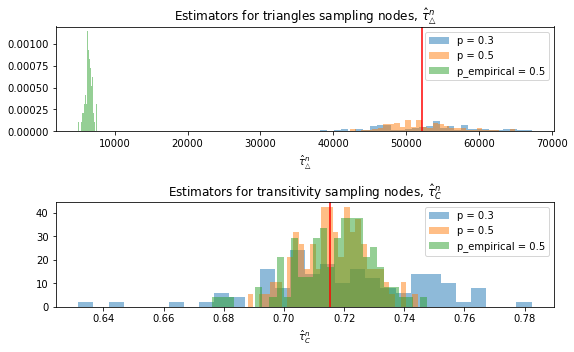

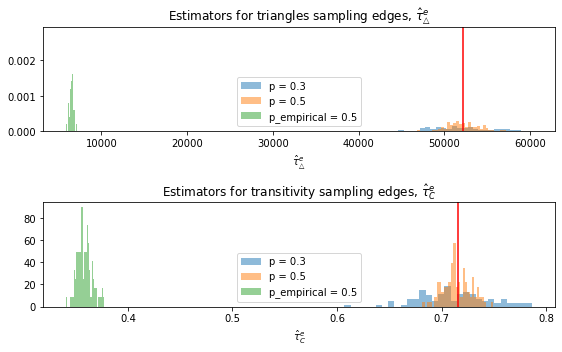

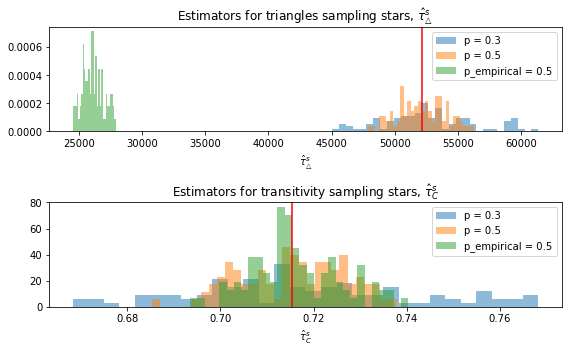

In [65]:
# f)# Histograms for node sampling
n_samp = 100
plot_histograms(n_samp, 'nodes')

# Histograms for edge sampling
n_samp = 100
plot_histograms(n_samp, 'edges')

# Histograms for star sampling
n_samp = 100
plot_histograms(n_samp, 'stars', p_empirical=.5)

### g. Use of real data
Let us now put the estimators we derived in use for real data. Below is a description of two network data sets and their collection methods. **Match** the datasets with one of the three sampling methods used and HT estimators we derived in this exercise. Note that you might need to do some assumptions about the uniformity of the sampling. **Calculate** the empirical esitimator and the plug-in HT estimator for the transitivities of these data sets.

- A social communication network was built based on call data records of a mobile phone operator. These records contain all the incoming and outcoming calls the customers make and receive, but no data for the calls between pairs of customers who are both with a competitor. The network is built in a way that each phone number appearing in the data becomes a node and there is a link between them if there is at least one call between the numbers. The underlying network we would be interested in is the communication network between all the customers of all companies in the country it operates. The company has $6,421,148$ customers which amounts to a market share of 20\% of customers in the country. The network contains $75,048,105$ nodes, $529,816,040$ links, and there are $153,328,324$ triangles and $15,856,481,566$ two-stars around our customers. Note that since our network contains all incoming and outgoing calls - including numbers in other countries, the number of customers is not equal to $20\%$ of the network. 
- Using the same mobile phone data as above, we build a social network between the customers of the company. That is, we leave out the phone numbers which are not operated by our mobile phone operator. The underlying network we would be interested is the actual contact network between the company customers. Based on a small questionnaire we have made, on average only $10\%$ of the contacts take place via mobile phones in that country at that time. The network contains $6,421,148$ nodes, $26,415,938$ links, $11,794,486$ triangles and $634,259,263$ two-stars.